# Running OpenTTDLab with a single published AI

This example shows how you can use OpenTTDLab to run an experiment using a single AI published at https://bananas.openttd.org/package/ai

First install OpenTTDLab, pandas, and plotly.

In [ ]:
!python -m pip install OpenTTDLab==0.0.52 pandas==2.2.0 plotly==5.18.0

Then run a set of experiments.

In [2]:
from openttdlab import run_experiments, bananas_ai

# Run experiments...
results = run_experiments(
    openttd_version='13.4',  # ... for a specific versions of OpenTTD
    opengfx_version='7.1',   # ... and a specific versions of OpenGFX
    experiments=(
       {
         # ... for random seeds
         'seed': seed,
         # ... running specific AIs. In this case a single AI, with no
         # parameters, fetching it from https://bananas.openttd.org/package/ai
         'ais': (
             bananas_ai('54524149', 'trAIns', ai_params=()),
         ),
         # ... each for a number of (in game) days
         'days': 365 * 4 + 1,
       }
       for seed in range(0, 10)
    ),
)

Output()

Then plot the results.

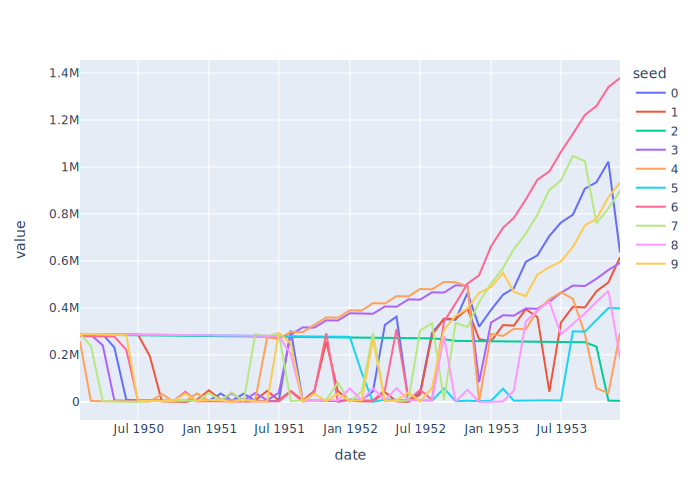

In [3]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# This makes the chart visible for publishing this notebook to GitHub
# Comment it out for an interactive chart
pio.renderers.default = "svg"

df = pd.DataFrame(
    {
        'seed': row['experiment']['seed'],
        'date': row['date'],
        'money': row['chunks']['PLYR']['0']['money'],
    }
    for row in results
)
df = df.pivot(index='date', columns='seed', values='money')
fig = px.line(df)
fig

That's it!